In [85]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical

In [86]:
#load and explore dataset
train_data = pd.read_csv('Train.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]  
y = train_data.iloc[:, 0]   

print("Shape of X after separating features:", X.shape)

Shape of train_data: (42000, 785)
Shape of X after separating features: (42000, 784)


In [87]:
train_data.head(10);

In [88]:
#data preprocessing
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (42000, 28, 28, 1)


In [89]:
#one-hot encoding labels
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (42000, 10)


In [90]:
#data splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (33600, 28, 28, 1)


In [91]:
#bulding neural network model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
#model training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8463 - loss: 0.5315 - val_accuracy: 0.9446 - val_loss: 0.1855
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9588 - loss: 0.1376 - val_accuracy: 0.9579 - val_loss: 0.1351
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.9741 - loss: 0.0863 - val_accuracy: 0.9651 - val_loss: 0.1118
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.9807 - loss: 0.0628 - val_accuracy: 0.9648 - val_loss: 0.1125
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.9845 - loss: 0.0455 - val_accuracy: 0.9713 - val_loss: 0.0955
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9886 - loss: 0.0341 - val_accuracy: 0.9698 - val_loss: 0.0994
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9914 - loss: 0.0275 - val_accuracy: 0.9667 - val_loss: 0.1199
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9926 - loss: 0.0

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.9750 - loss: 0.1100
Validation Accuracy: 97.29%


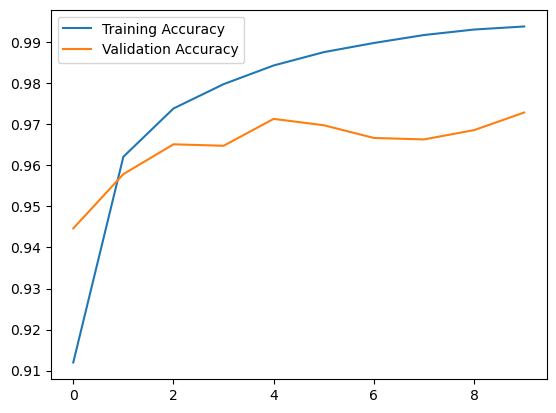

In [93]:
#model evaluating
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


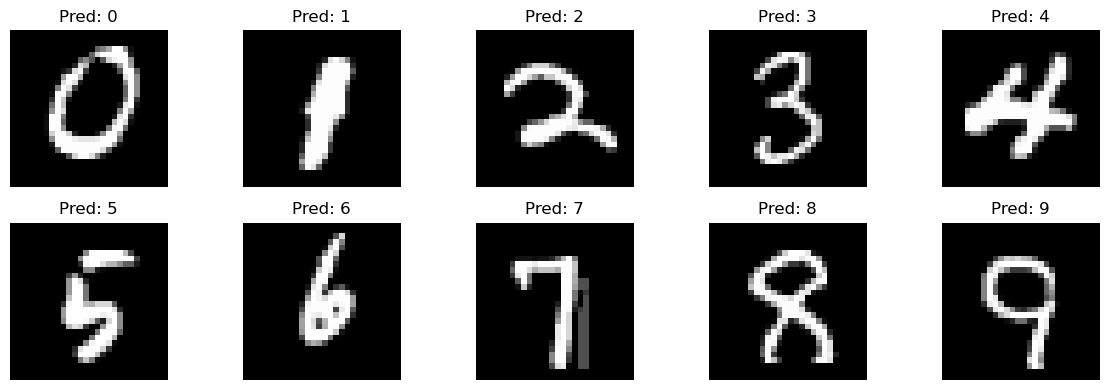

In [94]:
#make predictions
test_data = pd.read_csv('test.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
"""for i in range(len(X_test)):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()"""
# To store first occurrence index of each digit 0-9
first_indices = {}

# Loop over predictions to find the first occurrence of each digit
for idx, label in enumerate(predicted_labels):
    if label not in first_indices:
        first_indices[label] = idx
    if len(first_indices) == 10:  # found all digits
        break

# Plot the first occurrence of each digit
plt.figure(figsize=(12, 4))
for digit in range(10):
    idx = first_indices[digit]
    plt.subplot(2, 5, digit + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()